In [20]:
#Importing Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn import preprocessing
import seaborn as sns

#models for encoding
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

#for classificaion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#for tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



#for both regression and classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing other modules and libraries
from matplotlib.patches import Polygon
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, cohen_kappa_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, max_error, explained_variance_score 
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, make_scorer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from statistics import mean, stdev


In [21]:
#changing the width for a more natural view

pd.set_option('display.width', 900)

In [22]:
# In this section, I will predict the quality of the wines with different ML model

# 1st - We still start by loading the white wine dataset here and cleaning the columns
w_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-white.csv", sep=";")

print(w_wine.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
4            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6


In [23]:
# following common data science pratice and changing the coloumn nacmes

w_wine.columns = w_wine.columns.str.replace(' ', '_')
w_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [24]:
#Now we will split the dataset into two: one with 3 quality labels and the other with 4 quality labels

# This dataset will be transformed to include 3 quality labels
ww_3ql = w_wine.copy()

# This dataset will be transformed to include 4 quality labels
ww_4ql = w_wine.copy()

display(ww_3ql.head(5), ww_4ql.head(5))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
# Now I create a new column called "quality_label", define 3 ranges and associate each range with a label
ww_3ql["quality_label"] = ww_3ql["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")

# now, I transform these labels into categorical data types (specific to pandas) instead of simple string
ww_3ql["quality_label"] = pd.Categorical(ww_3ql["quality_label"], 
categories = ["low", "medium", "high"])

display(ww_3ql.head(5), ww_3ql.tail(5))

#check the dataset basic stats
display(ww_3ql.info())
display(ww_3ql.describe())


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         4898 non-null   float64 
 1   volatile_acidity      4898 non-null   float64 
 2   citric_acid           4898 non-null   float64 
 3   residual_sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free_sulfur_dioxide   4898 non-null   float64 
 6   total_sulfur_dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  quality_label         4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


None

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [26]:
# Now I compare the frequency of the different qualities of wines in the different datasets
display("Quality distribution - 3labels", pd.DataFrame(ww_3ql["quality_label"].value_counts()).sort_index())

'Quality distribution - 3labels'

,quality_label
low,1640
medium,3078
high,180


In [27]:
# checking if the below formula produces labels for labeling pie and bar chart automatically
labels_3 = ww_3ql["quality_label"].cat.categories
labels_3

Index(['low', 'medium', 'high'], dtype='object')

In [28]:
ww_3ql.iloc[:,:-1].head(5)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
ww_3ql.iloc[:,:-1].head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
# now I will prepare our data for the ML models
#First, I will label encode the quality column

#I will make a copy of the dataset
enc_3ql = ww_3ql.copy()

# Here we define our Encoder and give it an alias
le= LabelEncoder()

# now we transform the quality column variables into ordinal values and add the column to the dataframe
enc_3ql["Encoded"] = le.fit_transform(enc_3ql["quality_label"])

#checking the output of the encoder
display(enc_3ql.sample(5, random_state=42))

# encoded class labels
classes = list(le.classes_)

# now I check the encoded columns
Encoded_freq = enc_3ql["Encoded"].value_counts().to_frame().sort_index()
Encoded_view = Encoded_freq.assign(class_labels=classes)
display(Encoded_view)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,Encoded
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7,medium,2
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8,high,0
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8,high,0
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5,low,1
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7,medium,2


,Encoded,class_labels
0,180,high
1,1640,low
2,3078,medium


In [67]:
# Now that we have successfully implemented Stratified K Fold and normalizing data, we will try out other binary ML classifiers and output their results in table for better comparison.

# we initialize our dataset in for compfortable working
X = enc_3ql.iloc[:,:-3]
Y = enc_3ql.iloc[:,-1]

# We initialized each model in the first cell and below we will store it by name in a dictionary
models = {}

#Logistic Regression
models['LR'] = LogisticRegression()

# Support Vector Machines
models['SVC'] = LinearSVC()

#Decision Trees
models['D-Trees'] = DecisionTreeClassifier()

# Random Forest
models['R-Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest'] = KNeighborsClassifier()

# Neural Network
models['Neural Network'] = MLPClassifier()

# AdaBoost
models['AdaBoost'] = AdaBoostClassifier()

# GradientBoost
models['GradientBoost'] = GradientBoostingClassifier()

#Now we will create another dictionary to store the evaluation metrics
precision, recall, f1, accuracy, cohen = {}, {}, {}, {}, {}

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

#now we will loop over the dataset and the different models. First we will concentrate on the redwine dataset
for key in models.keys():
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

    #Now we scale our input features with normalisation technique
        scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test) 

    #fitting the classifiers on the training data
        models[key].fit(X_train_scaled, Y_train)

    #Let's make predictions  
        predictions = models[key].predict(X_test_scaled)

    #Let's calculate metrics
  
        precision[key] = precision_score(Y_test, predictions,average="weighted")
        recall[key] = recall_score(Y_test, predictions,average='weighted')
        f1[key] = f1_score(Y_test, predictions,average='weighted')
        accuracy[key] = accuracy_score(Y_test, predictions)
        cohen[key] = cohen_kappa_score(Y_test, predictions)

#we create a pandas frame with the stored metrics
Metrics = pd.DataFrame(index= models.keys(), columns=["Precision", "Recall", "f1", "Accuracy"])
Metrics['Precision'] = precision.values()
Metrics['Recall'] = recall.values()
Metrics['f1'] = accuracy.values()
Metrics['Accuracy'] = accuracy.values()
Metrics['Cohen'] = accuracy.values()

display(Metrics)


/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn

,Precision,Recall,f1,Accuracy,Cohen
LR,0.682550,0.712446,0.712446,0.712446,0.712446
SVC,0.687637,0.716738,0.716738,0.716738,0.716738
D-Trees,0.727685,0.725322,0.725322,0.725322,0.725322
R-Forest,0.817823,0.818312,0.818312,0.818312,0.818312
Naive Bayes,0.666022,0.683834,0.683834,0.683834,0.683834
K-Nearest,0.700455,0.712446,0.712446,0.712446,0.712446
Neural Network,0.702219,0.732475,0.732475,0.732475,0.732475
AdaBoost,0.687047,0.702432,0.702432,0.702432,0.702432
GradientBoost,0.744872,0.752504,0.752504,0.752504,0.752504


In [68]:
display(round(Metrics.sort_values(by=["f1"], ascending=False),2))

,Precision,Recall,f1,Accuracy,Cohen
R-Forest,0.82,0.82,0.82,0.82,0.82
GradientBoost,0.74,0.75,0.75,0.75,0.75
Neural Network,0.70,0.73,0.73,0.73,0.73
D-Trees,0.73,0.73,0.73,0.73,0.73
SVC,0.69,0.72,0.72,0.72,0.72
LR,0.68,0.71,0.71,0.71,0.71
K-Nearest,0.70,0.71,0.71,0.71,0.71
AdaBoost,0.69,0.70,0.70,0.70,0.70
Naive Bayes,0.67,0.68,0.68,0.68,0.68


In [32]:
# Random Forest performs best out of all the classifiers, gefolgt vom K-Nearest und Decision trees
# High Quality ist am schlechtesten

--------------------------------------------------------
The Classificaion Report for our model:
              precision    recall  f1-score   support

        high       0.92      0.44      0.59        25
         low       0.79      0.69      0.73       235
      medium       0.82      0.90      0.86       439

    accuracy                           0.81       699
   macro avg       0.84      0.68      0.73       699
weighted avg       0.81      0.81      0.81       699
 



,Precision,Recall,f1,Accuracy,Cohen
R-Forest,0.811615,0.811159,0.811159,0.811159,0.811159


--------------------------------------------------------
Confusion Matrix:


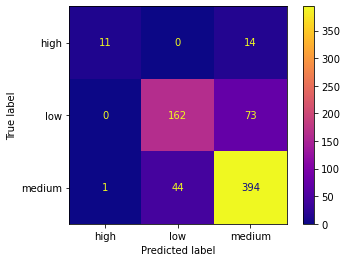

In [59]:
#We will focus on the Random Forest Model

# Now that we have successfully implemented Stratified K Fold and normalizing data, we will try out other binary ML classifiers and output their results in table for better comparison.

# we initialize our dataset in for compfortable working
X = enc_3ql.iloc[:,:-3]
Y = enc_3ql.iloc[:,-1]

# We initialized each model in the first cell and below we will store it by name in a dictionary
models = {}

# Random Forest
models['R-Forest'] = RandomForestClassifier()

#Now we will create another dictionary to store the evaluation metrics
precision, recall, f1, accuracy, cohen = {}, {}, {}, {}, {}

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

#now we will loop over the dataset and the different models. First we will concentrate on the redwine dataset
for key in models.keys():
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

    #Now we scale our input features with normalisation technique
        scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test) 

    #fitting the classifiers on the training data
        models[key].fit(X_train_scaled, Y_train)

    #Let's make predictions  
        predictions = models[key].predict(X_test_scaled)

    #Let's calculate metrics  
        precision[key] = precision_score(Y_test, predictions,average="weighted")
        recall[key] = recall_score(Y_test, predictions,average='weighted')
        f1[key] = f1_score(Y_test, predictions,average='weighted')
        accuracy[key] = accuracy_score(Y_test, predictions)
        cohen[key] = cohen_kappa_score(Y_test, predictions)

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, predictions, target_names=["high", "low", "medium"]),"\n")

#we create a pandas frame with the stored metrics
Metrics = pd.DataFrame(index= models.keys(), columns=["Precision", "Recall", "f1", "Accuracy"])
Metrics['Precision'] = precision.values()
Metrics['Recall'] = recall.values()
Metrics['f1'] = accuracy.values()
Metrics['Accuracy'] = accuracy.values()
Metrics['Cohen'] = accuracy.values()

display(Metrics)

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, predictions, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")


--------------------------------------------------------
checking input variables
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1 

--------------------------------------------------------
checking output variables
0    2
1    2
2    2
Name: Encoded, dtype: int64 

--------------------------------------------------------
checking the accuracy of our model
List of possible accuracy: [0.8142857142857143, 0.84, 0.8085714285714286, 0.82

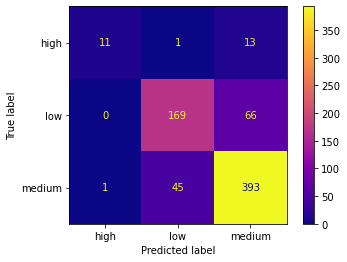

In [33]:
# After successfully encoding the labels, I will no drop unnecessary columns and check the output
#Since we have an imbalance dataset, we want to take the ratios into account when sampling and thus try the Stratified Kfold split function below to predic red or white wines

# And now we split the dataset into input and output, whereby X = input and Y = output
X = enc_3ql.iloc[:,:-3]
Y = enc_3ql.iloc[:,-1]

# Here we check our input and output variables
print("--------------------------------------------------------")
print("checking input variables")
print(X.head(3), "\n") 

print("--------------------------------------------------------")
print("checking output variables")
print(Y.head(3), "\n")

# Everything is working as expected. So we move on

#defining the classification model
rf = RandomForestClassifier()

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    rf.fit(X_train_scaled, Y_train)
    Y_predict = rf.predict(X_test_scaled)

    base_accuracy = accuracy_score(Y_predict, Y_test)
    accu_score.append(base_accuracy) 

# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_score)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_score)*100, '%')

print('\nMinimum Accuracy:', min(accu_score)*100, '%')

print('\nOverall Accuracy (mean):', np.mean(accu_score)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, Y_predict, target_names=["high", "low", "medium"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, Y_predict)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; tota

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 11,
 'min_samples_split': 10,
 'n_estimators': 100}

RandomForestClassifier(max_depth=20, min_samples_leaf=11, min_samples_split=10)

--------------------------------------------------------
checking the accuracy of our model
List of possible accuracy: [0.7628571428571429, 0.7957142857142857, 0.77, 0.7785714285714286, 0.79, 0.7696709585121603, 0.7510729613733905]

Maximum Accuracy That can be obtained from this model is: 79.57142857142857 %

Minimum Accuracy: 75.10729613733905 %

Overall Accuracy (mean): 77.39838252897727 % 

--------------------------------------------------------
The Classificaion Report for our model:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        25
         low       0.73      0.59      0.65       235
      medium       0.76      0.88      0.82       439

    accuracy                           0.75       699
   macro avg       0.50      0.49      0.49       699
weighted avg       0.72      0.75      0.73       699
 

--------------------------------------------------------
Cohen-Kappa score: 0.4484081632653061 

-------------------------

/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


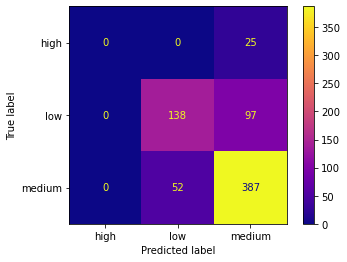

In [34]:
# Random search allowed us to narrow down the range for each hyperparameter.
#Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. Using GridSearchCV
# Now I will tune the parameters for better results:

# The random forest tuning mentioned the below as the best parameters for tuning:
#{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
#{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

# And now we split the dataset into input and output, whereby X = input and Y = output
X = enc_3ql.iloc[:,:-3]
Y = enc_3ql.iloc[:,-1]


# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [3, 7, 11],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 200]
    }

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Now we create a StratifiedKFold object with "n_split" folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    grid_search.fit(X_train_scaled, Y_train)
    Y_pred_grid = grid_search.predict(X_test_scaled)

    grid_accuracy = accuracy_score(Y_pred_grid, Y_test)
    accu_score.append(grid_accuracy) 

# Fit the grid search to the data
display(grid_search.best_params_)
    
best_grid = grid_search.best_estimator_

display(best_grid)

# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_score)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_score)*100, '%')

print('\nMinimum Accuracy:', min(accu_score)*100, '%')

print('\nOverall Accuracy (mean):', np.mean(accu_score)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, Y_pred_grid, target_names=["high", "low", "medium"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, Y_pred_grid)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_grid, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1


,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150; tot

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 11,
 'min_samples_split': 5,
 'n_estimators': 150}

RandomForestClassifier(max_depth=10, min_samples_leaf=11, min_samples_split=5,
                       n_estimators=150)

--------------------------------------------------------
checking the accuracy of our model
List of possible accuracy: [0.7628571428571429, 0.8157142857142857, 0.7242857142857143, 0.7685714285714286, 0.7628571428571429, 0.7496423462088698, 0.7510729613733905]

Maximum Accuracy That can be obtained from this model is: 81.57142857142857 %

Minimum Accuracy: 72.42857142857143 %

Overall Accuracy (mean): 76.21430031239964 % 

--------------------------------------------------------
The Classificaion Report for our model:


/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00        25
         low       0.74      0.57      0.64       235
      medium       0.76      0.89      0.82       439

    accuracy                           0.75       699
   macro avg       0.50      0.49      0.49       699
weighted avg       0.72      0.75      0.73       699
 

--------------------------------------------------------
Cohen-Kappa score: 0.44429519162234765 

--------------------------------------------------------
Confusion Matrix. Decition Tree Classifier
Improvement of -8.38%.


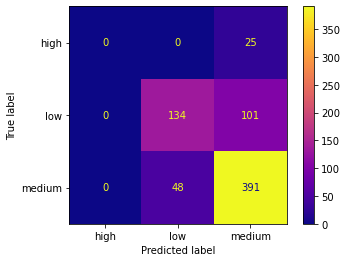

In [55]:
# I dropped some features that are not significant to see whether they impact predictions or not

# And now we split the dataset into input and output, whereby X = input and Y = output
X = enc_3ql.iloc[:,:-3].drop(["citric_acid", "free_sulfur_dioxide"], axis=1)
Y = enc_3ql.iloc[:,-1]

display (X.head(3))

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [3, 7, 11],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 150]
    }

# Create a based model
dt = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Now we create a StratifiedKFold object with "n_split" folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    grid_search.fit(X_train_scaled, Y_train)
    Y_pred_grid = grid_search.predict(X_test_scaled)

    grid_accuracy = accuracy_score(Y_pred_grid, Y_test)
    accu_score.append(grid_accuracy) 

# Fit the grid search to the data
display(grid_search.best_params_)
    
best_grid = grid_search.best_estimator_

display(best_grid)

# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_score)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_score)*100, '%')

print('\nMinimum Accuracy:', min(accu_score)*100, '%')

print('\nOverall Accuracy (mean):', np.mean(accu_score)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, Y_pred_grid, target_names=["high", "low", "medium"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, Y_pred_grid)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix. Decition Tree Classifier")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_grid, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; tot

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=5)

--------------------------------------------------------
checking the accuracy of our model
List of possible accuracy: [0.7571428571428571, 0.81, 0.73, 0.7657142857142857, 0.7842857142857143, 0.7453505007153076, 0.7625178826895566]

Maximum Accuracy That can be obtained from this model is: 81.0 %

Minimum Accuracy: 73.0 %

Overall Accuracy (mean): 76.50016057925316 % 

--------------------------------------------------------
The Classificaion Report for our model:
              precision    recall  f1-score   support

        high       1.00      0.08      0.15        25
         low       0.75      0.59      0.66       235
      medium       0.77      0.90      0.83       439

    accuracy                           0.76       699
   macro avg       0.84      0.52      0.54       699
weighted avg       0.77      0.76      0.75       699
 

--------------------------------------------------------
Cohen-Kappa score: 0.47282193871987777 

--------------------------------------------------

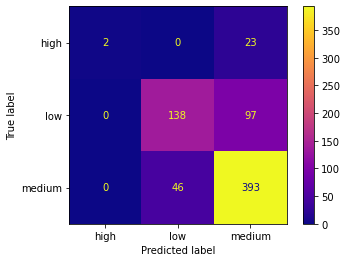

In [56]:
# I dropped some features that are not significant to see whether they impact predictions or not

# And now we split the dataset into input and output, whereby X = input and Y = output
X = enc_3ql.iloc[:,:-3].drop(["citric_acid", "free_sulfur_dioxide"], axis=1)
Y = enc_3ql.iloc[:,-1]

display (X.head(3))

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [3, 7, 11],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 150]
    }

# Create a based model
dt = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Now we create a StratifiedKFold object with "n_split" folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    grid_search.fit(X_train_scaled, Y_train)
    Y_pred_grid = grid_search.predict(X_test_scaled)

    grid_accuracy = accuracy_score(Y_pred_grid, Y_test)
    accu_score.append(grid_accuracy) 

# Fit the grid search to the data
display(grid_search.best_params_)
    
best_grid = grid_search.best_estimator_

display(best_grid)

# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_score)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_score)*100, '%')

print('\nMinimum Accuracy:', min(accu_score)*100, '%')

print('\nOverall Accuracy (mean):', np.mean(accu_score)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, Y_pred_grid, target_names=["high", "low", "medium"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, Y_pred_grid)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix. Decision Tree Classifier")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_grid, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1


--------------------------------------------------------
checking the accuracy of our model
List of possible accuracy: [0.8228571428571428, 0.8028571428571428, 0.8071428571428572, 0.8314285714285714, 0.8028571428571428, 0.8283261802575107, 0.8226037195994278]

Maximum Accuracy That can be obtained from this model is: 83.14285714285714 %

Minimum Accuracy: 80.28571428571428 %

Overall Accuracy (mean): 81.68675367142565 % 

--------------------------------------------------------
The Classificaion Report for our model:
              precision    recall  f1-score   support

        high       1.00      0.32      0.48        25
         low       0.82      0.69      0.75       235
      medium       0.82      0.92      0.87       439

    accuracy                           0.82       699
   macro avg       0.88      0.64      0.70       699
weighted avg       0.83      0.82      0.81       699
 

--------------------------------------------------------
Cohen-Kappa score: 0.6158796000850884

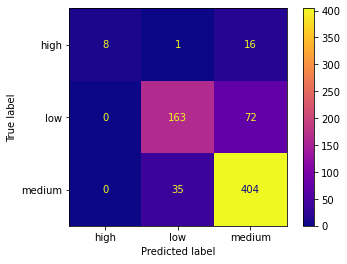

In [72]:
# I dropped some features that are not significant to see whether they impact predictions or not

# And now we split the dataset into input and output, whereby X = input and Y = output
X = enc_3ql.iloc[:,:-3].drop(["citric_acid", "free_sulfur_dioxide"], axis=1)
Y = enc_3ql.iloc[:,-1]

display (X.head(3))

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [3, 7, 11],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 150]
    }

# Create a based model
rfc = RandomForestClassifier()

# Now we create a StratifiedKFold object with "n_split" folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=17)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    rfc.fit(X_train_scaled, Y_train)
    Y_pred = rfc.predict(X_test_scaled)

    accuracy = accuracy_score(Y_pred, Y_test)
    accu_score.append(accuracy) 


# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_score)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_score)*100, '%')

print('\nMinimum Accuracy:', min(accu_score)*100, '%')

print('\nOverall Accuracy (mean):', np.mean(accu_score)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, Y_pred, target_names=["high", "low", "medium"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, Y_pred)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix. Random Forest")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")

print('Improvement of {:0.2f}%.'.format( 100 * (accuracy - base_accuracy) / base_accuracy))
